In [1]:
pythia160_weights_path = "../../weights/linearity/lsr/safety_layer12_Layer{i}_Layer-1.pt"
pythia410_weights_path = "../../weights/linearity/lsr/safety_layer24_Layer{i}_Layer-1.pt"
pythia70_weights_path = "../../weights/linearity/lsr/safety_layer6_Layer{i}.pt"

pythia70_weights = []
pythia160_weights = []
pythia410_weights = []

import torch

for i in range(6):
    pythia70_weights.append(torch.load(pythia70_weights_path.format(i=i)))
    
for i in range(12):
    pythia160_weights.append(torch.load(pythia160_weights_path.format(i=i)))

for i in range(24):
    pythia410_weights.append(torch.load(pythia410_weights_path.format(i=i)))

print(pythia70_weights[0].shape)

torch.Size([180])


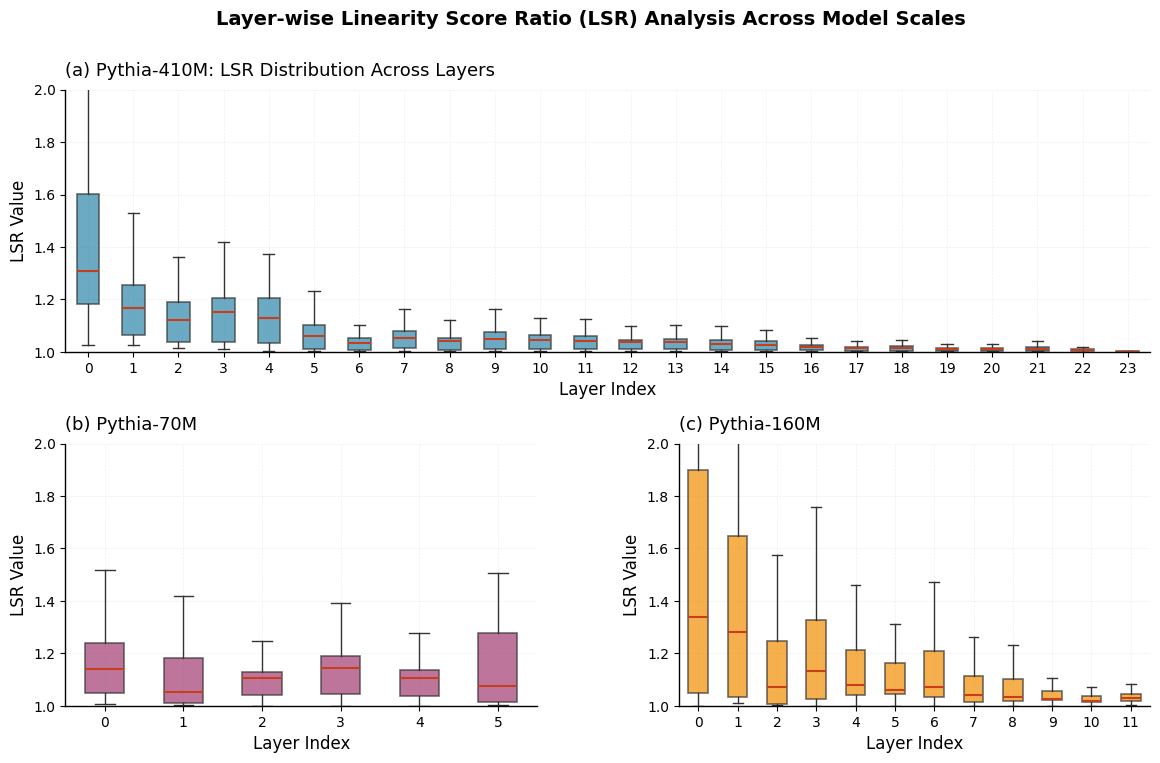

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Set publication-quality style
plt.rcParams.update({
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14,
    'text.usetex': False,
    'axes.linewidth': 1.0,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.5,
})

# Create figure with custom layout
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.35, wspace=0.3)

# Prepare data
pythia410_data = [w.cpu().numpy().flatten() for w in pythia410_weights]
pythia70_data = [w.cpu().numpy().flatten() for w in pythia70_weights]
pythia160_data = [w.cpu().numpy().flatten() for w in pythia160_weights]

# Color scheme - professional blue palette
colors = ['#2E86AB', '#A23B72', '#F18F01']
box_props = dict(linewidth=1.2, color='#333333')
whisker_props = dict(linewidth=1.0, color='#333333')
median_props = dict(linewidth=1.5, color='#C73E1D')
flier_props = dict(marker='', linestyle='none')  # Hide outliers

# First row: Pythia-410m (spans both columns)
ax_410 = fig.add_subplot(gs[0, :])
bp_410 = ax_410.boxplot(pythia410_data, 
                         tick_labels=[f'{i}' for i in range(24)],
                         patch_artist=True,
                         boxprops=dict(**box_props, facecolor=colors[0], alpha=0.7),
                         whiskerprops=whisker_props,
                         medianprops=median_props,
                         flierprops=flier_props,
                         capprops=dict(linewidth=1.0, color='#333333'),
                         showfliers=False)
ax_410.set_title('(a) Pythia-410M: LSR Distribution Across Layers', 
                 fontweight='normal', loc='left', pad=10)
ax_410.set_xlabel('Layer Index', fontweight='normal')
ax_410.set_ylabel('LSR Value', fontweight='normal')
ax_410.set_ylim([1, 2])
ax_410.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax_410.spines['top'].set_visible(False)
ax_410.spines['right'].set_visible(False)

# Second row, left: Pythia-70m
ax_70 = fig.add_subplot(gs[1, 0])
bp_70 = ax_70.boxplot(pythia70_data, 
                      tick_labels=[f'{i}' for i in range(6)],
                      patch_artist=True,
                      boxprops=dict(**box_props, facecolor=colors[1], alpha=0.7),
                      whiskerprops=whisker_props,
                      medianprops=median_props,
                      flierprops=flier_props,
                      capprops=dict(linewidth=1.0, color='#333333'),
                      showfliers=False)
ax_70.set_title('(b) Pythia-70M', fontweight='normal', loc='left', pad=10)
ax_70.set_xlabel('Layer Index', fontweight='normal')
ax_70.set_ylabel('LSR Value', fontweight='normal')
ax_70.set_ylim([1, 2])
ax_70.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax_70.spines['top'].set_visible(False)
ax_70.spines['right'].set_visible(False)

# Second row, right: Pythia-160m
ax_160 = fig.add_subplot(gs[1, 1])
bp_160 = ax_160.boxplot(pythia160_data, 
                        tick_labels=[f'{i}' for i in range(12)],
                        patch_artist=True,
                        boxprops=dict(**box_props, facecolor=colors[2], alpha=0.7),
                        whiskerprops=whisker_props,
                        medianprops=median_props,
                        flierprops=flier_props,
                        capprops=dict(linewidth=1.0, color='#333333'),
                        showfliers=False)
ax_160.set_title('(c) Pythia-160M', fontweight='normal', loc='left', pad=10)
ax_160.set_xlabel('Layer Index', fontweight='normal')
ax_160.set_ylabel('LSR Value', fontweight='normal')
ax_160.set_ylim([1, 2])
ax_160.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax_160.spines['top'].set_visible(False)
ax_160.spines['right'].set_visible(False)

# Add overall figure title
fig.suptitle('Layer-wise Linearity Score Ratio (LSR) Analysis Across Model Scales', 
             fontsize=14, fontweight='bold', y=0.98)
fig.savefig('../../assets/figs/linearity/linearity_analysis_lsr_size.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


In [6]:
larger_alpha_size = "../../weights/linearity/lsr/safety_layer24_Layer{i}_Layer-1_Alpha1.pt"
data_larger_alpha_size = []
for i in range(24):
    data_larger_alpha_size.append(torch.load(larger_alpha_size.format(i=i)))

print(data_larger_alpha_size[0].shape)


torch.Size([180])


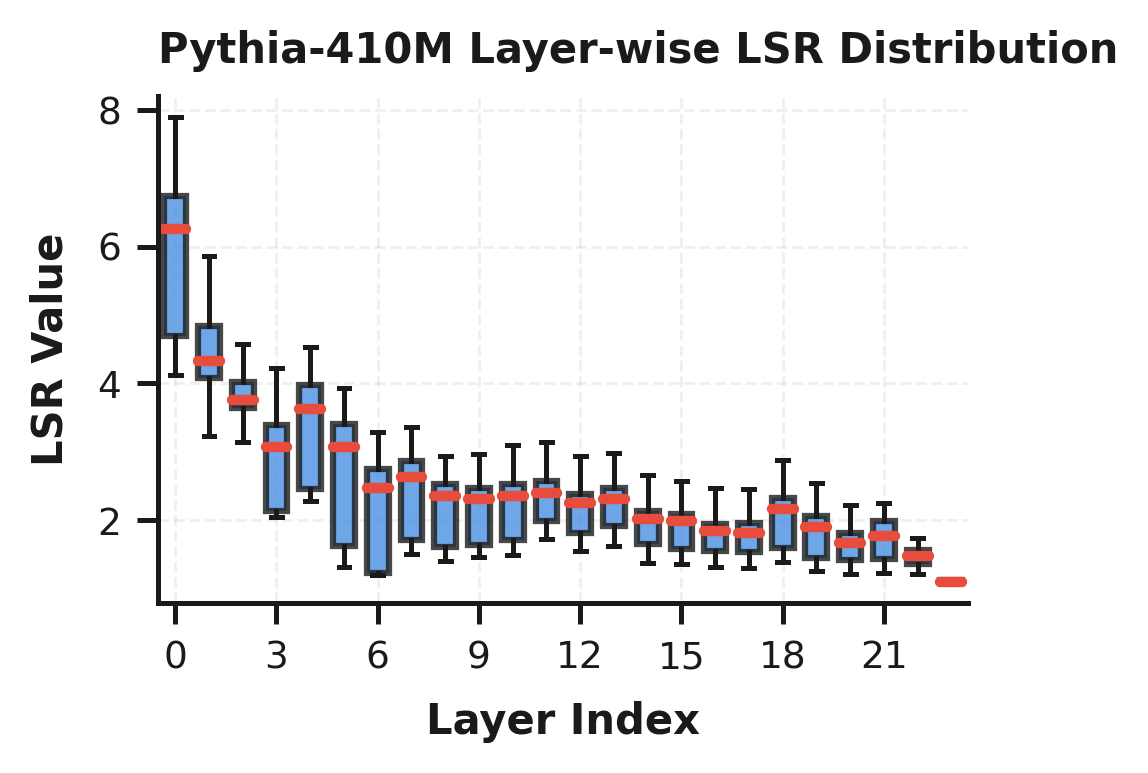

In [17]:
# Set up publication-quality figure with ICML styling
fig, ax = plt.subplots(figsize=(3.25, 2.5), dpi=300)

# Prepare data for boxplot
pythia410_data = [data_larger_alpha_size[i].cpu().numpy() for i in range(24)]

# ICML-style color palette - professional and accessible
color = '#4A90E2'  # Professional blue
box_props = dict(linewidth=1.5, edgecolor='#1a1a1a')
whisker_props = dict(linewidth=1.2, color='#1a1a1a', linestyle='-')
median_props = dict(linewidth=2.5, color='#E74C3C', solid_capstyle='round')
flier_props = dict(marker='o', markerfacecolor='#95a5a6', markersize=2, alpha=0.3, markeredgewidth=0)
cap_props = dict(linewidth=1.2, color='#1a1a1a')

# Create boxplot with publication-quality styling
bp = ax.boxplot(pythia410_data,
                tick_labels=[f'{i}' for i in range(24)],
                patch_artist=True,
                boxprops=dict(**box_props, facecolor=color, alpha=0.8),
                whiskerprops=whisker_props,
                medianprops=median_props,
                flierprops=flier_props,
                capprops=cap_props,
                showfliers=False,
                widths=0.65)

# Professional axis labels
ax.set_xlabel('Layer Index', fontsize=10, fontweight='600', color='#1a1a1a', labelpad=6)
ax.set_ylabel('LSR Value', fontsize=10, fontweight='600', color='#1a1a1a', labelpad=6)
ax.set_ylim([0.8, 8.2])

# Refined grid
ax.grid(True, alpha=0.12, linestyle='--', linewidth=0.7, color='#7f8c8d', zorder=0)
ax.set_axisbelow(True)

# Clean spine styling
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
    ax.spines[spine].set_color('#1a1a1a')

# Professional tick styling - show every 3rd layer to reduce crowding
ax.set_xticks(range(1, 25, 3))
ax.set_xticklabels([f'{i}' for i in range(0, 24, 3)])
ax.tick_params(labelsize=9, colors='#1a1a1a', width=1.2, length=5)
ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='both', which='major', pad=4)

# Clean background
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Add subtle title for context
ax.set_title('Pythia-410M Layer-wise LSR Distribution', 
             fontsize=10, fontweight='600', color='#1a1a1a', pad=8, loc='left')

# Optimal layout
plt.tight_layout(pad=0.4)
plt.savefig('../../assets/figs/linearity/linearity_analysis_lsr_size_alpha1.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()
